## Install Libraries

In [1]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagged')
from collections import Counter
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
sns.set

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michele/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/michele/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Error loading averaged_perceptron_tagged: Package
[nltk_data]     'averaged_perceptron_tagged' not found in index


<function seaborn.rcmod.set(*args, **kwargs)>

## Install Files

In [3]:
# Install Text File
with open('../Data/Key_events_20th.txt', 'r', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [5]:
# Import list of countries
c_list = pd.read_csv(r'../Data/countries_list.csv', index_col=False)

## Tokenize Text

In [4]:
# Sentence Tokenize
sent_token = sent_tokenize(data)

In [5]:
print(sent_token)

['Key events of the 20th century - WikipediaJump to contentMain menuMain menumove to sidebarhide\t\tNavigation\tMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\t\tContribute\tHelpLearn to editCommunity portalRecent changesUpload fileSearchSearchDonateAppearanceCreate accountLog inPersonal tools Create account Log in\t\tPages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Historic events in the 20th centuryToggle Historic events in the 20th century subsection1.1World at the beginning of the century1.1.1"The war to end all wars": World War I (1914–1918)1.1.2Russian Revolution and communism1.2Between the wars1.2.1Economic depression1.2.2The rise of dictatorship1.3Global war: World War II (1939–1945)1.3.1The war in Europe1.3.2Blitzkrieg1.3.3Operation Barbarossa1.3.4Turning tides1.3.5Operation Overlord1.3.6Final days1.3.7The war in the Pacific1.3.7.1Background1.3.8Japanese Expansion1.3.9Allied offensive1.3.10Final days1.3.11The Holo

In [335]:
# Word tokenize
word_token = word_tokenize(data)

In [336]:
# Check frequency of words
words_freq = FreqDist(word_token)

In [9]:
# 10 most common words
words_freq.most_common(10)

[('.', 1276),
 ('the', 1095),
 (',', 965),
 ('of', 603),
 ('and', 397),
 ('to', 326),
 ('[', 302),
 (']', 302),
 ('The', 300),
 ('in', 290)]

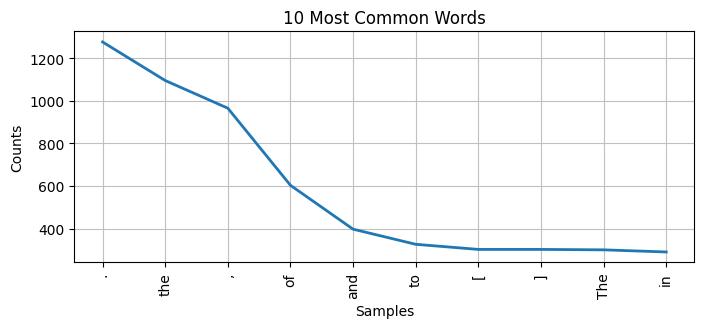

<Axes: title={'center': '10 Most Common Words'}, xlabel='Samples', ylabel='Counts'>

In [23]:
# Plot 10 most common words
plt.figure(figsize=(8,3))
words_freq.plot(10, cumulative=False, title='10 Most Common Words')

## Filters Words and Punctuation

In [19]:
# Get list of English words
stop_words = set(stopwords.words('English'))

In [337]:
# Filter words
filtered_words = [] # Create empty list
for word in word_token:
    if word not in stop_words:
        filtered_words.append(word)

In [25]:
# Frequency of words after filtering 
filtered_freq = FreqDist(filtered_words)

In [180]:
# 10 most commopn words
filtered_freq.most_common(10)

[('.', 1276),
 (',', 965),
 ('[', 302),
 (']', 302),
 ('The', 300),
 ("''", 279),
 ('``', 273),
 ('(', 243),
 (')', 243),
 ('December', 222)]

In [338]:
# Remove possessive 's and any punctuation
no_punct = [re.sub(r"'s\b", "", word) for word in filtered_words]  # Remove possessive forms
no_punct = [re.sub(r"[^\w\s]", "", word) for word in no_punct]     # Remove any other punctuation

In [339]:
# Remove empty strings
no_punct = [word for word in no_punct if word]

In [183]:
# Frequency Distribution
freq_no_punct = FreqDist(no_punct)

In [184]:
# 15 most common words
freq_no_punct.most_common(10)

[('The', 301),
 ('2018', 242),
 ('December', 222),
 ('Retrieved', 205),
 ('War', 123),
 ('war', 79),
 ('World', 76),
 ('Soviet', 55),
 ('20', 54),
 ('Hitler', 50)]

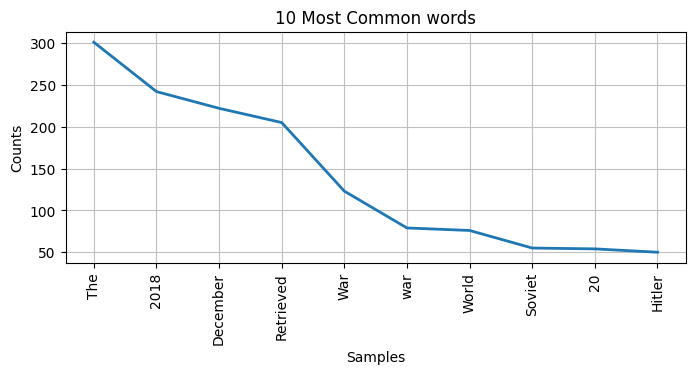

<Axes: title={'center': '10 Most Common words'}, xlabel='Samples', ylabel='Counts'>

In [185]:
# Plot 10 most common after filtering
plt.figure(figsize=(8,3))
freq_no_punct.plot(10, cumulative=False, title='10 Most Common words')

Discounting the presence of some words with little meaning, such as the article 'the', most of the most common terms used on the Wikipedia page about the significant events of the 20th century are related to the world wars and their consequences, such as, for example, 'war,' '2018,' the date marking the end of the First World War, or 'Hitler.

## Create Tag List

In [340]:
# Filter article
filter = ['The']

In [341]:
filtered = [] # Create empty list
for word in no_punct:
    if word not in filter:
        filtered.append(word)

In [201]:
# Create Text Blob
text = TextBlob(' '.join(filtered))

In [202]:
# Create Text Tags
tags = text.tags

In [236]:
# Create Dataframe witg tags
df_tags = pd.DataFrame(tags)
df_tags.columns = ['word', 'type']

In [237]:
# Group tags
word_type = df_tags.groupby('type').count().reset_index()

In [238]:
# Select only largest groups
top20 = word_type.nlargest(20, 'word')

In [239]:
# Palette
palette = sns.color_palette('light:#ffa756_r', as_cmap=False, n_colors=20)

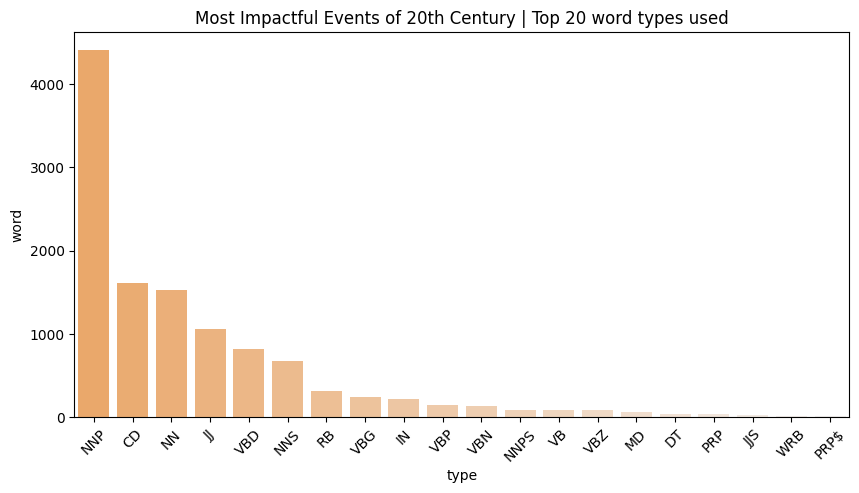

In [241]:
# Plot top 20 word tags
plt.figure(figsize=(10,5))
sns.barplot(x='type', y='word', data=top20, palette=palette).set_title('Most Impactful Events of 20th Century | Top 20 word types used')
plt.xticks(rotation=45)
plt.show()

In [242]:
# Select Nouns Tags
nouns = df_tags[(df_tags['type']=='NNP') | (df_tags['type']=='NN') | (df_tags['type']=='NNS') | (df_tags['type']=='NNPS')]

In [254]:
# Rename cols
nouns.columns=('Words', 'Frequency')

In [255]:
# Group tags
x = nouns.groupby('Words').count().reset_index()

In [256]:
y = x.sort_values(by=['Frequency'], ascending=False)

In [260]:
# Select only largest groups
noun15 = y.nlargest(15, 'Frequency')

In [261]:
# Palette
palette = sns.color_palette('light:#82a67d_r', as_cmap=False, n_colors=15)

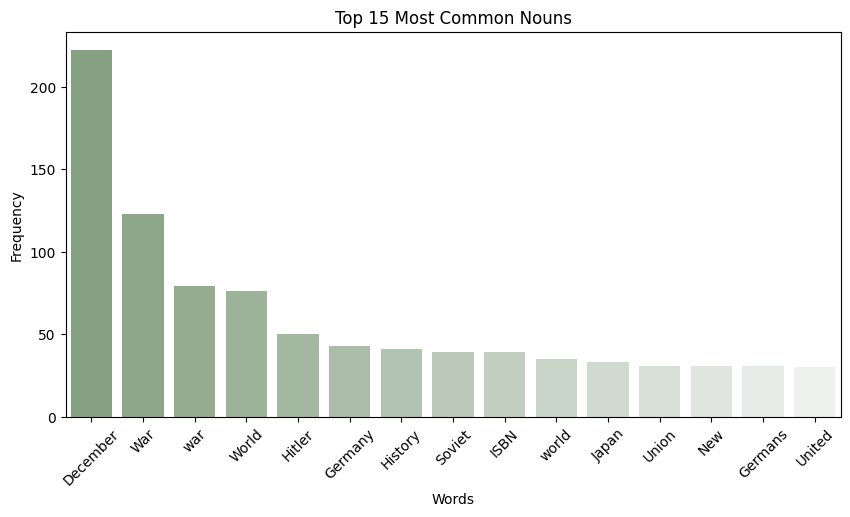

In [262]:
# Plot top 15 nouns
plt.figure(figsize=(10,5))
sns.barplot(x='Words', y='Frequency', data=noun15, palette=palette).set_title('Top 15 Most Common Nouns')
plt.xticks(rotation=45)
plt.show()

In [263]:
# Select Verbs Tags
verbs = df_tags[(df_tags['type']=='VBD') | (df_tags['type']=='VBG') | (df_tags['type']=='VBP') | (df_tags['type']=='VBN') | (df_tags['type']=='VBZ')]

In [264]:
# Rename cols
verbs.columns=('Verbs', 'Frequency')

In [265]:
# Group tags
x = verbs.groupby('Verbs').count().reset_index()

In [267]:
y = x.sort_values(by=['Frequency'], ascending=False)

In [268]:
# Select largest group
verb15 = y.nlargest(15, 'Frequency')

In [269]:
# Palette
palette = sns.color_palette('light:#f9bc08_r', as_cmap=False, n_colors=15)

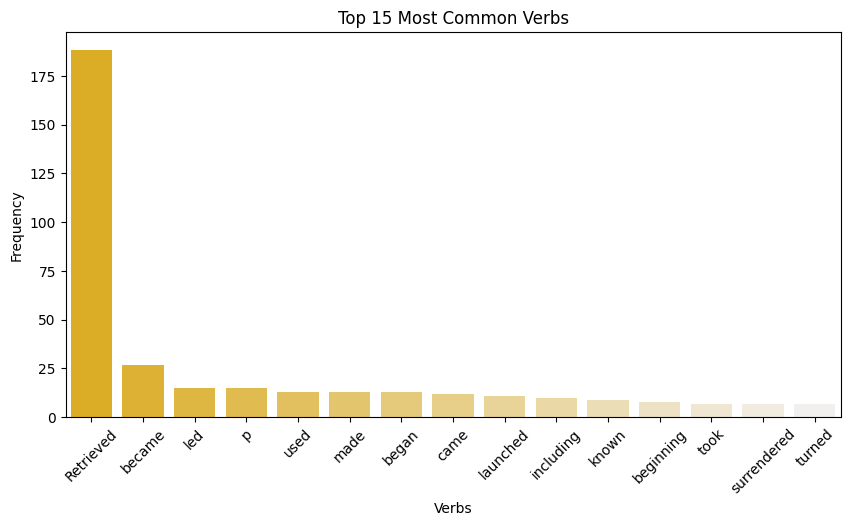

In [273]:
# Plot top 15 verbs
plt.figure(figsize=(10,5))
sns.barplot(x='Verbs', y='Frequency', data=verb15, palette=palette).set_title('Top 15 Most Common Verbs')
plt.xticks(rotation=45)
plt.show()

In [285]:
# Select adjectives
adj = df_tags[(df_tags['type']=='JJ') | (df_tags['type']=='JJS')]

In [286]:
# Rename cols
adj.columns=('Adjectives', 'Frequency')

In [287]:
# Group tags
x = adj.groupby('Adjectives').count().reset_index()

In [288]:
y = x.sort_values(by=['Frequency'], ascending=False)

In [289]:
# Top 15
adj15 = y.nlargest(15, 'Frequency')

In [280]:
# Palette
palette = sns.color_palette('light:#ff7855_r', as_cmap=False, n_colors=15)

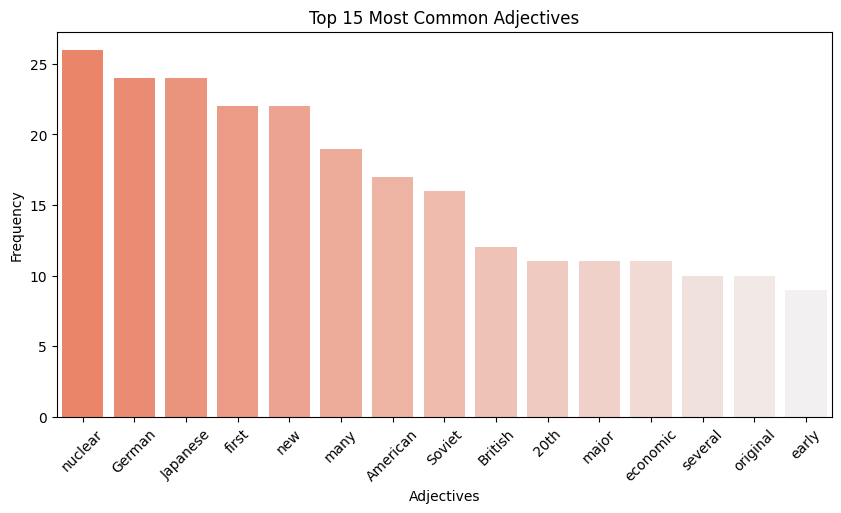

In [290]:
# Plot top 15 adj
plt.figure(figsize=(10,5))
sns.barplot(x='Adjectives', y='Frequency', data=adj15, palette=palette).set_title('Top 15 Most Common Adjectives')
plt.xticks(rotation=45)
plt.show()

The two lists of the 15 most frequent words and the 15 most frequent adjectives are more significant compared to that of the verbs. In this case as well, it is primarily the armed conflicts that are represented. Among the most frequent words are 'War,' 'World,' and 'Hitler'; among the adjectives are 'nuclear,' 'German,' and 'Japanese.'

## Frequency of Countries Names

In [360]:
# Convert countries list df to list
country_names = c_list['country_name'].str.strip().tolist()

In [362]:
# Match with the tokenized  coutries
filtered_countries = [word for word in filtered if word in country_names]

In [363]:
# Count frequency
country_counts = Counter(filtered_countries)

In [364]:
print(country_counts)

Counter({'Germany': 43, 'Japan': 33, 'France': 16, 'Italy': 14, 'Poland': 13, 'Vietnam': 13, 'Russia': 10, 'India': 9, 'Norway': 5, 'Libya': 5, 'Philippines': 5, 'Finland': 4, 'Greece': 4, 'Iran': 4, 'Israel': 4, 'Austria': 3, 'Lithuania': 3, 'Denmark': 3, 'Pakistan': 3, 'Romania': 3, 'Cuba': 3, 'Bulgaria': 2, 'Ukraine': 2, 'Estonia': 2, 'Latvia': 2, 'Belgium': 2, 'Netherlands': 2, 'Albania': 2, 'Egypt': 2, 'Singapore': 2, 'Guinea': 2, 'Australia': 2, 'Bangladesh': 2, 'Cambodia': 2, 'Canada': 2, 'Spain': 1, 'Luxembourg': 1, 'Sweden': 1, 'Belarus': 1, 'Iraq': 1, 'Morocco': 1, 'Algeria': 1, 'Thailand': 1, 'Mexico': 1, 'Laos': 1, 'Kenya': 1, 'Ghana': 1, 'Seychelles': 1, 'Angola': 1, 'Mozambique': 1, 'Hungary': 1, 'Mongolia': 1, 'Ireland': 1, 'Lebanon': 1})


In [368]:
# Create Dataframe
df_country = pd.DataFrame.from_dict(country_counts, orient='index', columns=['Frequency']).reset_index()

In [371]:
# Rename index col
df_country = df_country.rename(columns={'index':'Country'})

In [377]:
# Oder Country Frequency
country_ord = df_country.sort_values(by='Frequency', ascending=False).head(10)

In [385]:
# Palette
palette = sns.color_palette('light:#03719c_r', as_cmap=False, n_colors=10)

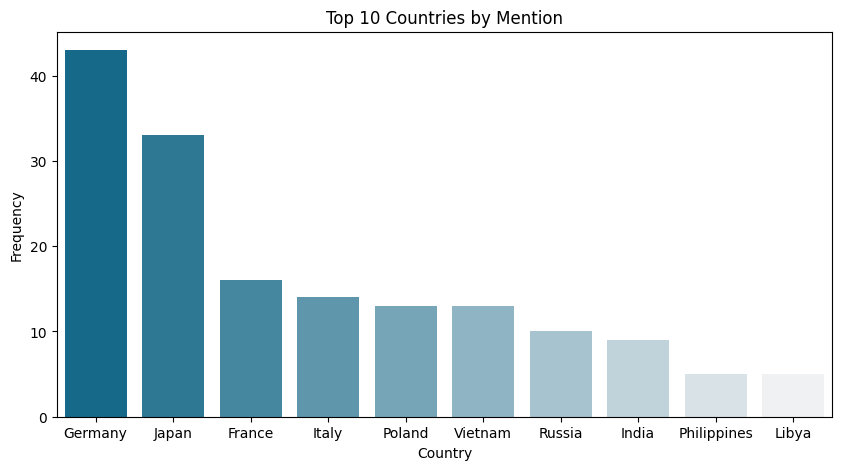

In [386]:
# Plot frequency of countries
plt.figure(figsize=(10,5))
sns.barplot(x='Country', y='Frequency', data=country_ord, palette=palette)
plt.title('Top 10 Countries by Mention')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.show()

Even in the list of the most mentioned countries on the Wikipedia page about the events of the 20th century, the references to wars seem to be predominant, including both world wars and the Vietnam War. The absence of the USA is surprising.

Even in the list of the most mentioned countries on the Wikipedia page about the events of the 20th century, the references to wars seem to be predominant, including both world wars and the Vietnam War. The absence of the USA is surprising.